XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  100 / length of first array dimension                NAXIS2  =                18487 / length of second array dimension               PCOUNT  =                    0 / group parameter count (not used)               GCOUNT  =                    1 / group count (not used)                         TFIELDS =                   20 / number of table fields                         TTYPE1  = 'TIME    '           / column title: data time stamps                 TFORM1  = 'D       '           / column format: 64-bit floating point           TUNIT1  = 'BJD - 2457000, days&' / column units: Barycenter corrected TESS JuliaCONTINUE  '' /n Date (BTJD)                                                     TDISP1  = 'D14.7   '           / column 

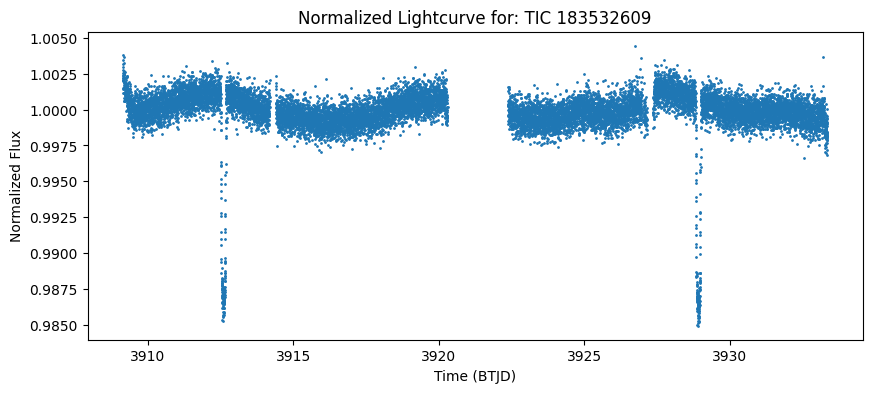

In [16]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

file_name = '/Users/jmese/.lightkurve/cache/mastDownload/TESS/tess2025232030459-s0096-0000000183532609-0293-s/tess2025232030459-s0096-0000000183532609-0293-s_lc.fits'
with fits.open(file_name) as hdul:
    image_data = hdul[1].data
    print(hdul[1].header)
    time_array = image_data['TIME']
    flux_array = image_data['PDCSAP_Flux']
    mask = np.isfinite(time_array) & np.isfinite(flux_array)
    time_clean = time_array[mask] #cleans arrays of NANs
    flux_clean = flux_array[mask]

flux_norm = flux_clean / np.nanmedian(flux_clean)

plt.figure(figsize = (10,4))
plt.plot(time_clean, flux_norm, '.', markersize=2)
plt.xlabel("Time (BTJD)")
plt.ylabel("Normalized Flux")
plt.title("Normalized Lightcurve for: TIC 183532609") 
plt.show()
